# Capstone I Project: Medical Insurance Cost Analysis

## Objectives

The high cost of health care in the U.S. has been ranked as the top financial burden on individuals and families in the country over years. The increase of health care costs not only affect how individuals make decisions about their health coverage and best insurance option, but it also impacts the insurance companies in assessing the costs and making decisions about pricing and risk assessment.

This project aims to explore and analyze the factors that influence medical costs. The medical insurance cost data set is obtained from Kaggle website; it contains 2,772 observations and 7 variables including 1) Age, 2) Sex, 3) BMI (body mass index), 4) Children, 5) Smoker, 6) Region, and 7) Charges.

**Problem statement**: What are the top factors driving medical costs?

In [1]:
# setup libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
import warnings
warnings.filterwarnings('ignore')

## Check data structure
The data set is clean and complete with no missing values.

In [2]:
# read data
data = pd.read_csv('data/medical_insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


#### Data structure:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


## Exploratory analysis on variables
## 1) Charges: 
In this project, charges and medical costs are used interchangeably. This is the dependent variable to be measured against other variables to see if and how they have impact on the medical charges. The total charges of all observations are \\$36,760,517. The average charges per person is \\$13,261. The lowest charges are \\$1,121 and the maximum charges are \\$63,770. There're more charges that fall in the lower intervals on the left (smaller charges less than around \\$12,000) and less charges that are in the larger intervals on the right (larger charges up to \~$60,000).

#### Summary statistics of Charges:

In [4]:
total = round(data["charges"].sum(), 2)
print(f"Total charges = {total:,}")

Total charges = 36,760,517.53


In [5]:
round(data["charges"].describe(), 2)

count     2772.00
mean     13261.37
std      12151.77
min       1121.87
25%       4687.80
50%       9333.01
75%      16577.78
max      63770.43
Name: charges, dtype: float64

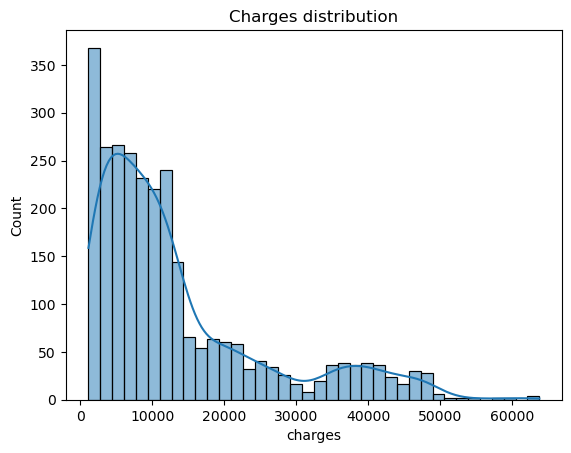

In [6]:
sns.histplot(data, x= "charges", kde= True).set_title("Charges distribution");

## 2) Age:

The observations' average age is 39, the youngest is 18, and 64 is the oldest. A new variable was created by discretizing the age variable and binning it into 4 discrete **age groups**: Youth 15-24, Adult 25-34, MiddleAged 35-59, and Senior 60+. While those younger age less than 20s and the oldest of 64 appear to be higher in number based on the age distribution, once the observations got binned into categorical age groups there're more observations that fall in MiddleAged 35-59 age group (1,388 / 50%) than other age groups. Senior 60+ age group is the smallest (186 / 7%).

#### Summary statistics of Age:

In [7]:
# explore age
data["age"].describe().apply("{0:.2f}".format)

count    2772.00
mean       39.11
std        14.08
min        18.00
25%        26.00
50%        39.00
75%        51.00
max        64.00
Name: age, dtype: object

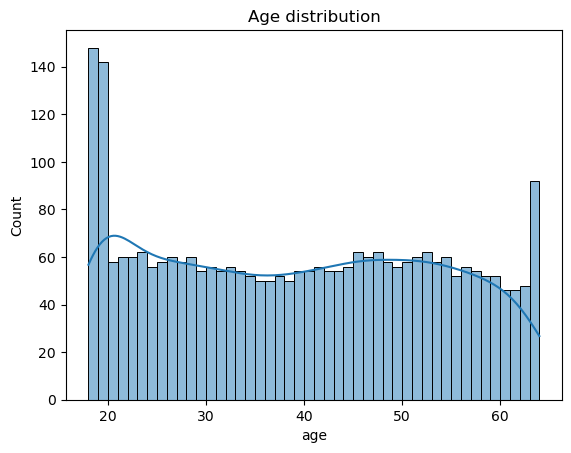

In [8]:
sns.histplot(data, x= "age", binwidth= 1, kde= True).set_title("Age distribution");

#### Age discretization:

In [9]:
# age vs charges
# Discretization - group into discrete age buckets
bins = [15, 25, 35, 60, 100]
group_names = ["Youth 15-24", "Adult 25-34", "MiddleAged 35-59", "Senior 60+"]
data["age_group"] = pd.cut(data['age'], bins, labels= group_names)
data["age_group"]

0            Youth 15-24
1            Youth 15-24
2            Adult 25-34
3            Adult 25-34
4            Adult 25-34
              ...       
2767    MiddleAged 35-59
2768         Youth 15-24
2769         Youth 15-24
2770         Youth 15-24
2771    MiddleAged 35-59
Name: age_group, Length: 2772, dtype: category
Categories (4, object): ['Youth 15-24' < 'Adult 25-34' < 'MiddleAged 35-59' < 'Senior 60+']

#### Count of Age group:

In [10]:
df = data.groupby("age_group", as_index= False).size()
df['%'] = round((df['size'] / df['size'].sum()) * 100)
df

,age_group,size,%
0,Youth 15-24,644,23.0
1,Adult 25-34,554,20.0
2,MiddleAged 35-59,1388,50.0
3,Senior 60+,186,7.0


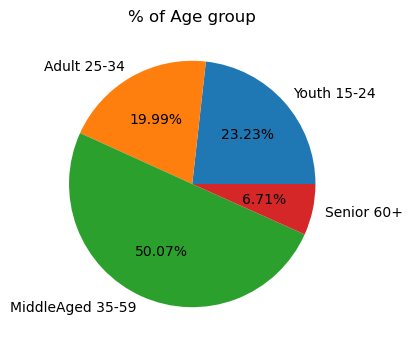

In [11]:
fig, axs = plt.subplots(figsize= (8, 4))
plt.pie(df["size"], labels= df["age_group"], autopct= '%.2f%%')
plt.title("% of Age group");

### How does age affect the medical costs?

The lowest charges are among the Youth 15-24 group (\\$1,122) and highest charges are among the MiddleAged 35-59 group (\\$63,770). The total charges of MiddleAged 35-59 group are the highest (\\$21,081,091 / 57%) comparing to other age groups reflecting accordingly to the larger number of observations in MiddleAged group. While total charges of Senior 60+ group appear to be the smallest (\\$3,959,593 / 11%), they are the highest in average charges per person (\\$21,288) comparing to MiddleAged 35-59 group that as an average charge of \\$15,188). Age factor appears to have positive correlation to medical charges - the charges get higher when the age increases.

#### Summaries of Charges by Age group:

In [12]:
pivot = round(data.pivot_table(index="age_group",
                values="charges", 
                 aggfunc=["mean", "sum", "min", "max"],
                 margins= False).rename(columns= {'mean': 'avg', 'sum': 'total'}), 2)

pivot['%total charges'] = round((pivot['total'] / pivot['total'].sum()) * 100)
pivot.style.format('{0:,.0f}')

,avg,total,min,max,%total charges
,charges,charges,charges,charges,
age_group,,,,,
Youth 15-24,"9,027","5,813,444","1,122","44,501",16
Adult 25-34,"10,661","5,906,390","2,302","58,571",16
MiddleAged 35-59,"15,188","21,081,091","4,400","63,770",57
Senior 60+,"21,288","3,959,593","12,558","49,578",11


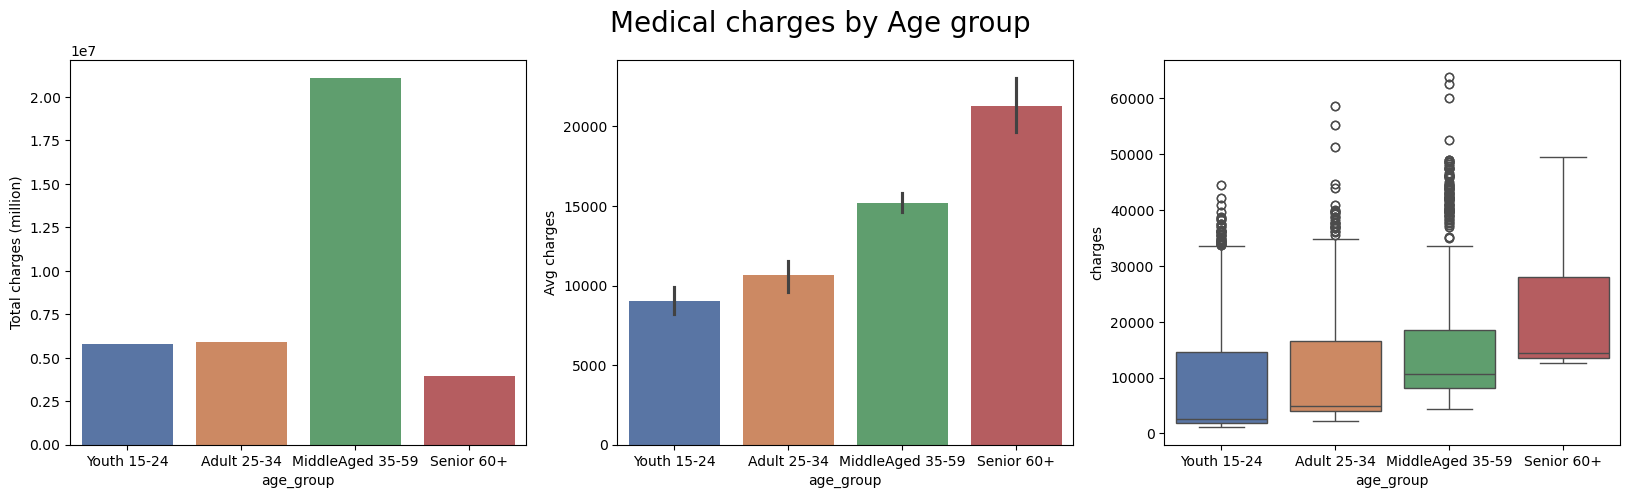

In [13]:
fig, axs = plt.subplots(ncols= 3, figsize= (20, 5))
ax1 = sns.barplot(data, x= "age_group", y= "charges", estimator= "sum", errorbar=None, ax= axs[0], palette="deep")
ax1.set(ylabel= "Total charges (million)")

ax2 = sns.barplot(data, x= "age_group", y= "charges", ax= axs[1], palette="deep")
ax2.set(ylabel= "Avg charges")

sns.boxplot(data, x= "age_group", y= "charges", ax= axs[2], palette="deep")

fig.suptitle("Medical charges by Age group", fontsize= 20);

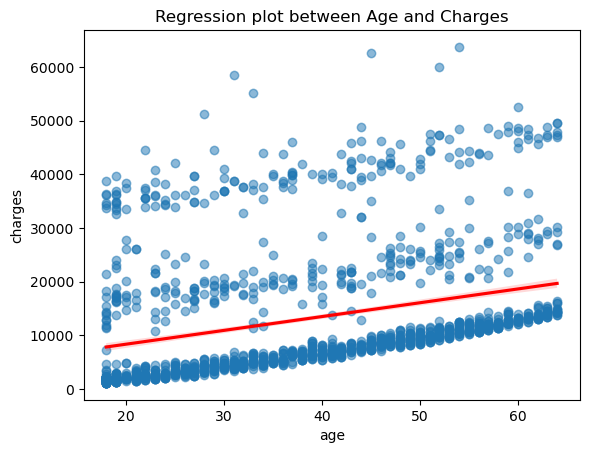

In [14]:
sns.regplot(data, 
            x= "age", 
            y= "charges", 
            line_kws=dict(color="r"), 
            scatter_kws={'alpha':0.3}).set_title("Regression plot between Age and Charges");

## 3) Gender:
### Is there any difference in medical charges between male and female?
Out of the total of 2,772 observations, there're slightly more male (1,406 / 51%) than female (1,366 / 49%). 

The total medical charges among male (\\$19,703,505 / 54%) are slightly higher than the charges among female (\\$17,057,012 / 46%). This is correlated to the higher number of male than female. The average charges per person in male (\\$14,013) are also slightly higher than female (\\$12,486). 

Looking further into how gender broken down by age would make any impact on medical charges, the results don't appear to be significantly different. The costs among male still are slightly higher than female across all age groups except in the Senior 60+ group where the total costs of female are slightly higher than male. Gender by itself doesn't appear to create significant influence on the charges. It would be worth exploring further on what might be the factors that cause the average charges on male to be higher than female.

#### Count of Gender:

In [15]:
# explore gender
df = data.groupby("sex", as_index= False).size()
df['%'] = round((df['size'] / df['size'].sum()) * 100)
df

,sex,size,%
0,female,1366,49.0
1,male,1406,51.0


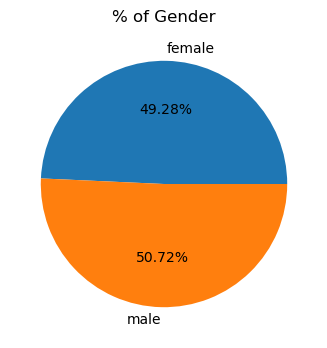

In [16]:
fig, axs = plt.subplots(figsize= (8, 4))
plt.pie(df["size"], labels= df["sex"], autopct= '%.2f%%')
plt.title("% of Gender");

#### Summaries of Charges by Gender:

In [17]:
pivot = data.pivot_table(index="sex",
                    values="charges", 
                    aggfunc=["mean", "sum"],
                    margins= True).rename(columns= {'mean': 'avg', 'sum': 'total'})

pivot['%total charges'] = round((pivot['total'] / pivot['total'][:-1].sum()) * 100)
pivot.style.format('{0:,.1f}')

,avg,total,%total charges
,charges,charges,
sex,,,
female,"12,486.8","17,057,012.5",46.0
male,"14,013.9","19,703,505.0",54.0
All,"13,261.4","36,760,517.5",100.0


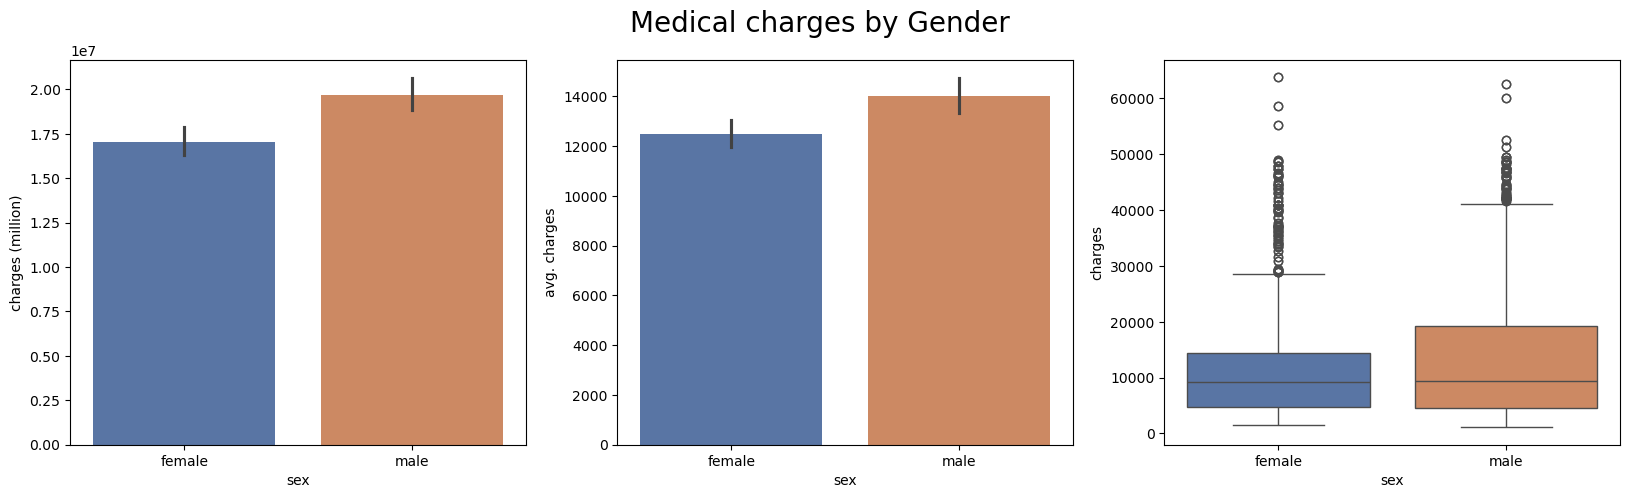

In [18]:
# sex vs charges
fig, axs = plt.subplots(ncols= 3, figsize= (20, 5))
sns.barplot(data, x= "sex", y= "charges", estimator= "sum", ax= axs[0], palette="deep").set(ylabel= "charges (million)")
sns.barplot(data, x= "sex", y= "charges", ax= axs[1], palette="deep").set(ylabel= "avg. charges")
sns.boxplot(data, x= "sex", y= "charges", ax= axs[2], palette="deep")

fig.suptitle("Medical charges by Gender", fontsize= 20);

#### Summaries of Charges by Gender and Age group:

In [19]:
data.pivot_table(index="sex",
                 columns="age_group",
                 values="charges", 
                 aggfunc=["mean", "sum"],
                 margins= True).rename(columns= {'mean': 'avg', 'sum': 'total'}).astype(int).style.format('{0:,.0f}')

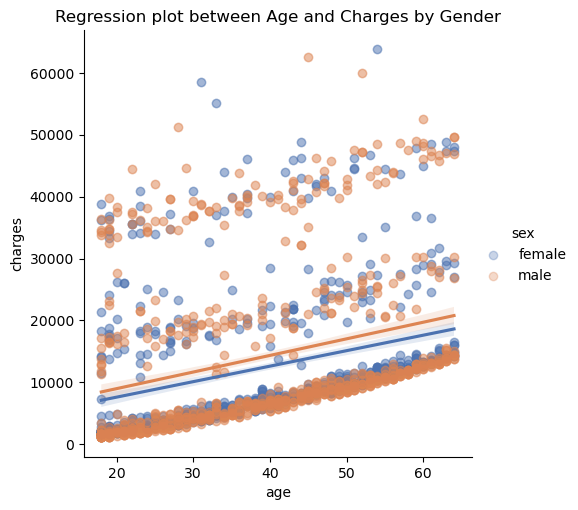

In [20]:
sns.lmplot(data, x= "age", y= "charges",hue= "sex", scatter_kws={'alpha':0.3}, palette="deep")
ax = plt.gca()
ax.set_title("Regression plot between Age and Charges by Gender");

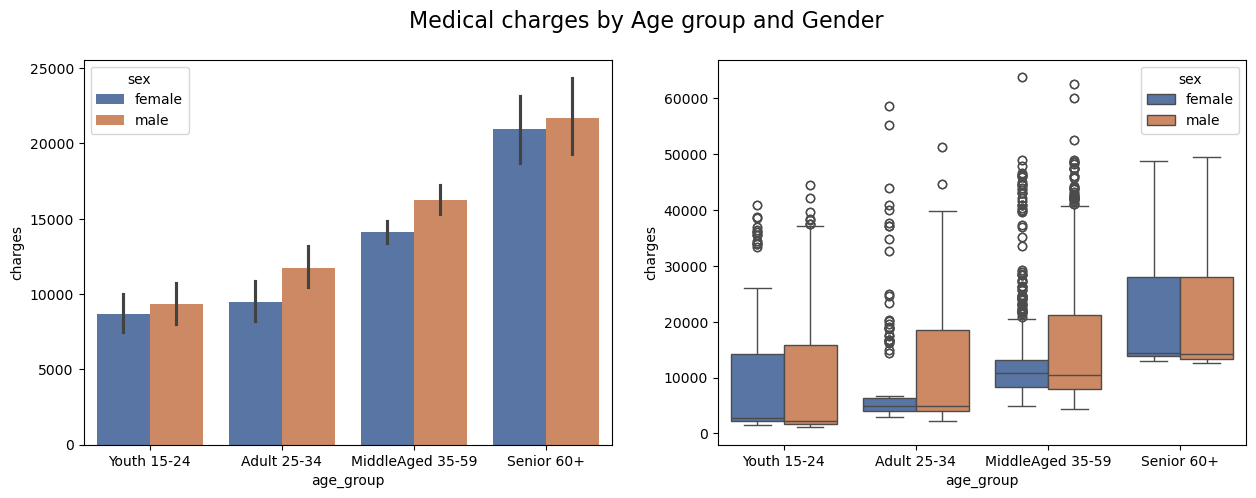

In [21]:
fig, axs = plt.subplots(ncols= 2, figsize= (15, 5))

sns.barplot(data, x= "age_group", y="charges", hue="sex",palette="deep", ax= axs[0])
sns.boxplot(data, x= "age_group", y= "charges", hue= "sex", palette="deep", ax= axs[1])

fig.suptitle("Medical charges by Age group and Gender", fontsize= 16);

## 4) Body Mass Index (BMI):
### Do most observations have healthy BMI? 
BMI is used to indicates high body fatness and screen for weight categories that may signify health problems. The observations' average BMI is 30.7, the lowest BMI is 15.96, and 53.13 is the highest. Similarly to Age, a new variable **"bmi_group"** got created by discretizing the variable and binning it into 5 discrete groups: Underweight <18.5, Healthy 18.5-24.9, Overweight 25-29.9, Obese 30-34.9, and Extremely Obese >35. Only 474 (17%) of all 2,772 observations is considered as healthy BMI, 2% (42) are underweight, 28% (790) are overweight, and more than half (53%) are those who are considered as obese (802 / 29%) to extremely obese (664 / 24%).

#### Summary statistics of BMI:

In [22]:
# explore bmi
data["bmi"].describe().apply("{0:.2f}".format)

count    2772.00
mean       30.70
std         6.13
min        15.96
25%        26.22
50%        30.45
75%        34.77
max        53.13
Name: bmi, dtype: object

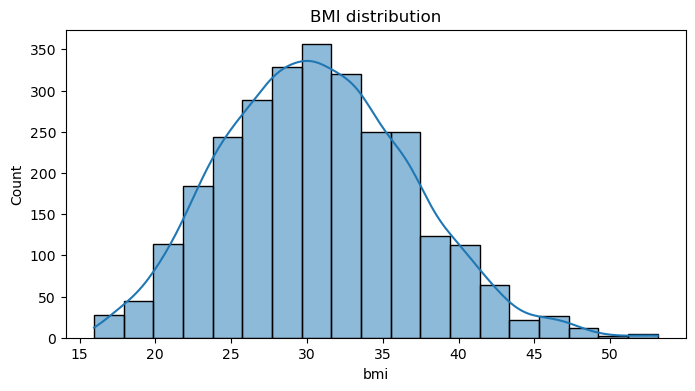

In [23]:
fig, axs = plt.subplots(figsize= (8, 4))
sns.histplot(data, x= "bmi", binwidth= 2, kde= True).set_title("BMI distribution");

#### BMI discretization:

In [24]:
# Discretization - group into discrete bmi buckets
bins = [10, 18.5, 25, 30, 35, 60]
group_names = ["Underweight <18.5", "Healthy 18.5-24.9", "Overweight 25-29.9", "Obese 30-34.9", "Extremely Obese >35"]
data["bmi_group"] = pd.cut(data['bmi'], bins, labels= group_names)
data["bmi_group"]

0        Overweight 25-29.9
1             Obese 30-34.9
2             Obese 30-34.9
3         Healthy 18.5-24.9
4        Overweight 25-29.9
               ...         
2767    Extremely Obese >35
2768          Obese 30-34.9
2769     Overweight 25-29.9
2770      Healthy 18.5-24.9
2771          Obese 30-34.9
Name: bmi_group, Length: 2772, dtype: category
Categories (5, object): ['Underweight <18.5' < 'Healthy 18.5-24.9' < 'Overweight 25-29.9' < 'Obese 30-34.9' < 'Extremely Obese >35']

#### Count of BMI group:

In [25]:
df = data.groupby("bmi_group", as_index= False).size()
df['%'] = round((df['size'] / df['size'].sum()) * 100)
df

,bmi_group,size,%
0,Underweight <18.5,42,2.0
1,Healthy 18.5-24.9,474,17.0
2,Overweight 25-29.9,790,28.0
3,Obese 30-34.9,802,29.0
4,Extremely Obese >35,664,24.0


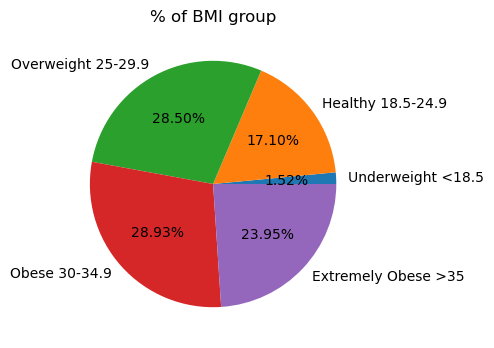

In [26]:
fig, axs = plt.subplots(figsize= (8, 4))
plt.pie(df["size"], labels= df["bmi_group"], autopct= '%.2f%%')
plt.title("% of BMI group");

### Does higher BMI increase medical costs?
The average cost per person of the healthy MBI group is \\$10,244 and the average costs appear to increase among those higher BMI groups. The highest average costs are among those extremely obese group at \\$17,041. The total costs of the overweight group (\\$8,710,439 / 24%) increase nearly as twice of the total costs of the healthy group (\\$4,855,758 / 13%) while the total costs of obese and extremely obese groups (\\$11,515,170 / 31% and \\$11,315,529 / 31% respectively) increase nearly triple of the healthy group. Maximum charges jumped from \\$38,245 to \~$63,000 between overweight group and the obese and extremely obese groups. BMI appears to have positive correlation in driving the charges higher.

Age and gender variables are added to the BMI analysis to explore further if there would be any significant impact on the medical costs, the results show that BMI has more impact on the charges of younger age groups especially the Youth 15-24 to MiddleAged 35-59 groups while higher BMI doesn't appear to have much impact at all on higher charges of the Senior 60+ group even though the group has higher average charges per person comparing to those younger age groups. Additionally, higher BMI appears to have more influence on the costs of male than female.

#### Summaries of Charges by BMI group:

In [27]:
pivot = round(data.pivot_table(index="bmi_group",
                values="charges", 
                aggfunc=["mean", "sum", "min", "max"],
                margins= True).rename(columns= {'mean': 'avg', 'sum': 'total'}), 2)

pivot['%total charges'] = round((pivot['total'] / pivot['total'][:-1].sum()) * 100)
pivot.style.format('{0:,.1f}')

,avg,total,min,max,%total charges
,charges,charges,charges,charges,
bmi_group,,,,,
Underweight <18.5,"8,657.6","363,620.1","1,621.3","32,734.2",1.0
Healthy 18.5-24.9,"10,244.2","4,855,758.3","1,121.9","35,069.4",13.0
Overweight 25-29.9,"11,025.9","8,710,439.2","1,252.4","38,245.6",24.0
Obese 30-34.9,"14,358.1","11,515,170.4","1,131.5","62,592.9",31.0
Extremely Obese >35,"17,041.5","11,315,529.6","1,141.5","63,770.4",31.0
All,"13,261.4","36,760,517.5","1,121.9","63,770.4",100.0


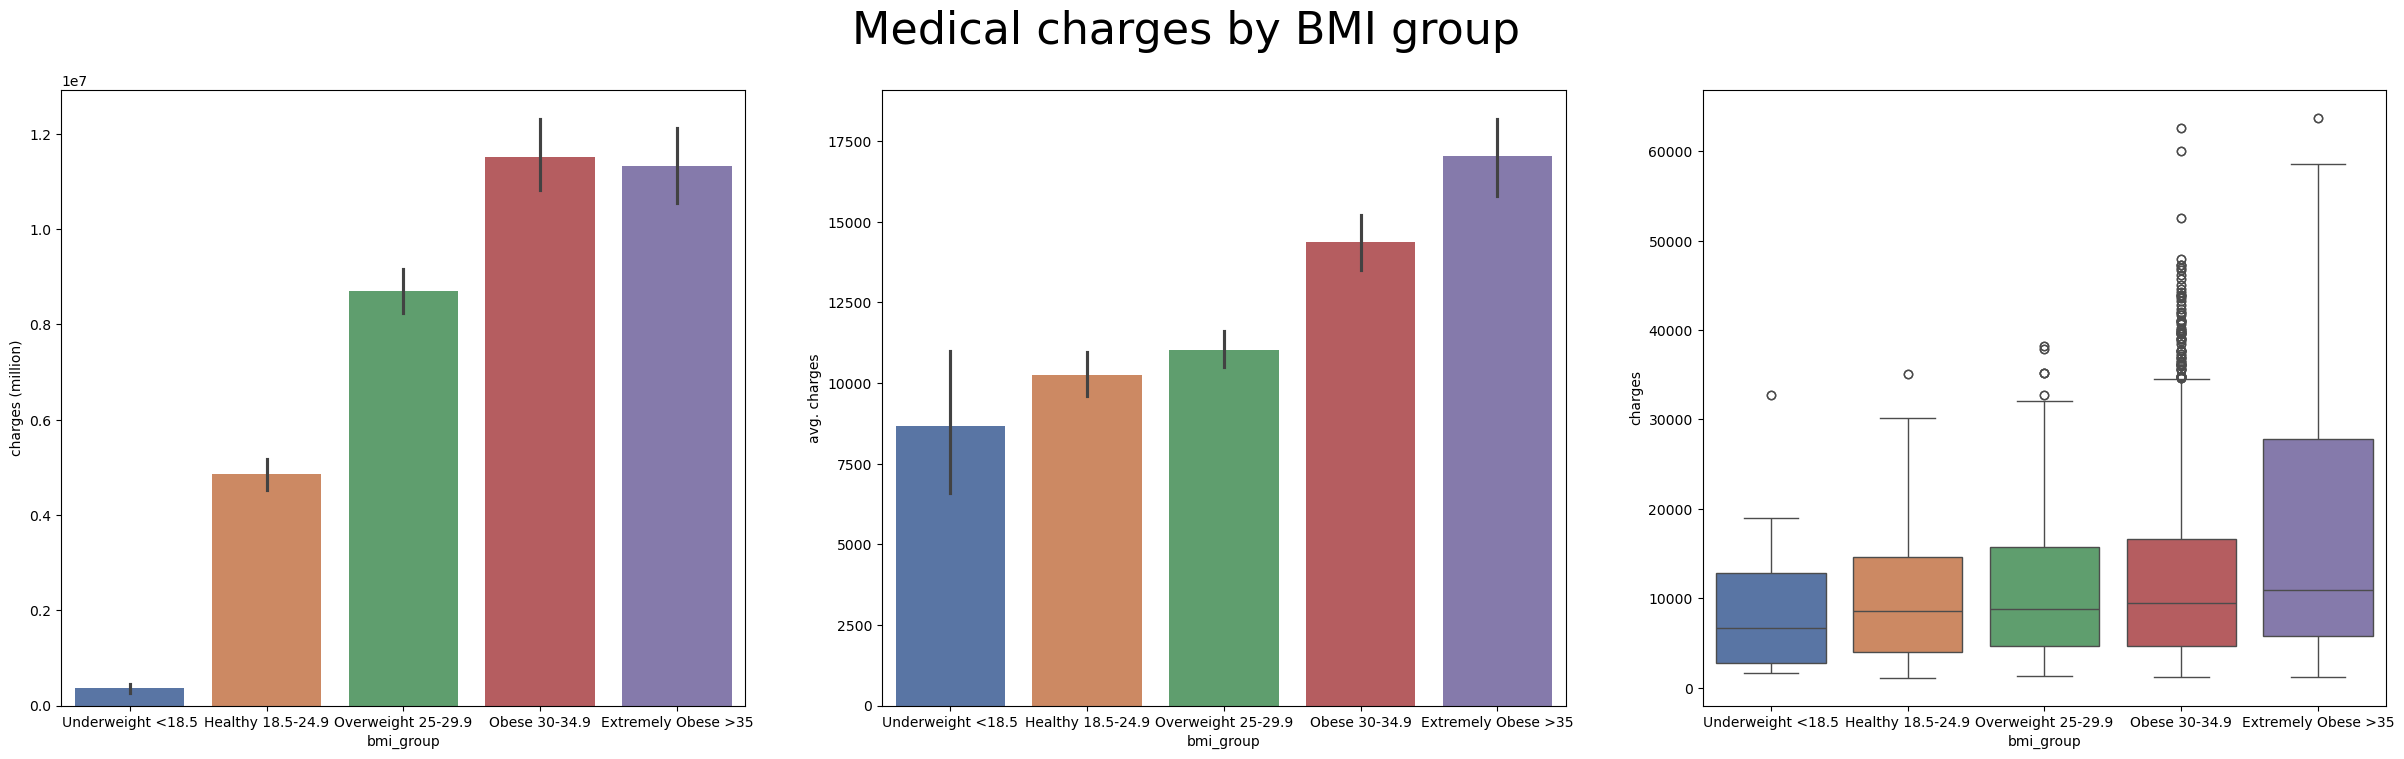

In [28]:
# bmi vs charges
fig, axs = plt.subplots(ncols= 3, figsize= (30, 8))
sns.barplot(data, x= "bmi_group", y= "charges", estimator= "sum", ax= axs[0], palette="deep").set(ylabel= "charges (million)")
sns.barplot(data, x= "bmi_group", y= "charges", ax= axs[1], palette="deep").set(ylabel= "avg. charges")
sns.boxplot(data, x= "bmi_group", y= "charges", ax= axs[2], palette="deep")

fig.suptitle("Medical charges by BMI group", fontsize= 32);

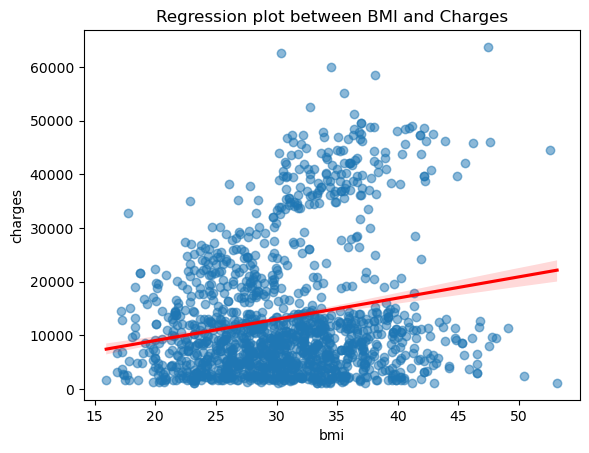

In [29]:
sns.regplot(data, 
            x= "bmi", 
            y= "charges", 
            line_kws=dict(color="r"), 
            scatter_kws={'alpha':0.3}).set_title("Regression plot between BMI and Charges");

#### Summaries of Charges by BMI group and Age group:

In [30]:
# bmi vs age
pivot = round(data.pivot_table(index="bmi_group",
                               columns="age_group",
                               values="charges", 
                               aggfunc=["mean", "sum"],
                               margins= True).rename(columns= {'mean': 'avg', 'sum': 'total'}), 2)

pivot.style.format('{0:,.1f}')

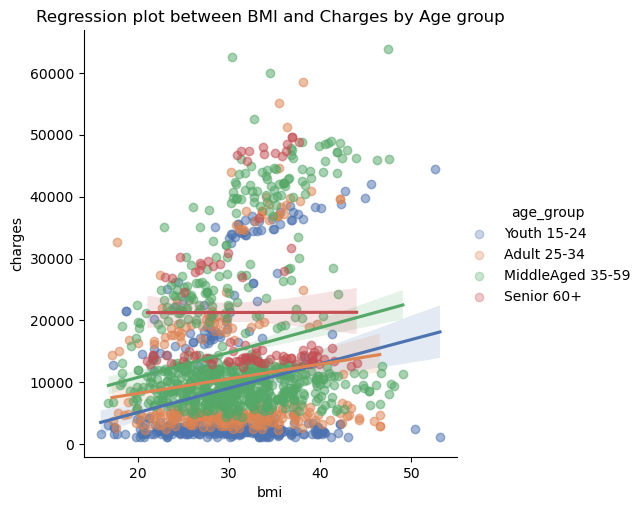

In [31]:
sns.lmplot(data, x= "bmi", y= "charges", hue= "age_group", scatter_kws={'alpha':0.3}, palette="deep")
ax = plt.gca()
ax.set_title("Regression plot between BMI and Charges by Age group");

#### Summaries of BMI by Gender:

In [32]:
# bmi vs gender
data.pivot_table(index="sex",
                 values="bmi",
                 aggfunc=["mean", "min", "max"],
                 margins= True).rename(columns= {'mean': 'avg'}).style.format('{0:,.2f}')

,avg,min,max
,bmi,bmi,bmi
sex,,,
female,30.43,16.82,48.07
male,30.96,15.96,53.13
All,30.70,15.96,53.13


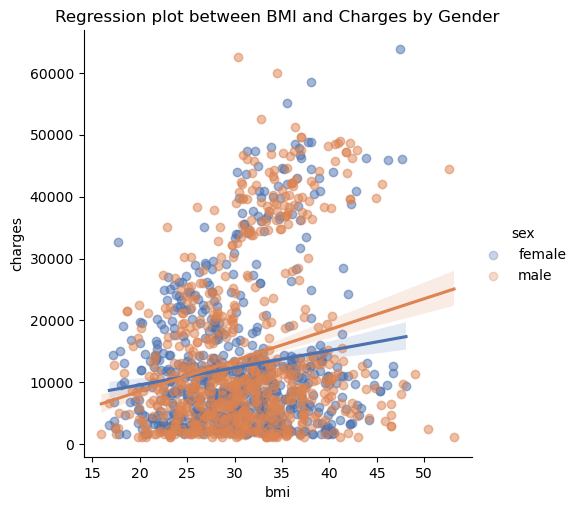

In [33]:
sns.lmplot(data, x= "bmi", y= "charges", hue= "sex", scatter_kws={'alpha':0.3}, palette="deep")
ax = plt.gca()
ax.set_title("Regression plot between BMI and Charges by Gender");

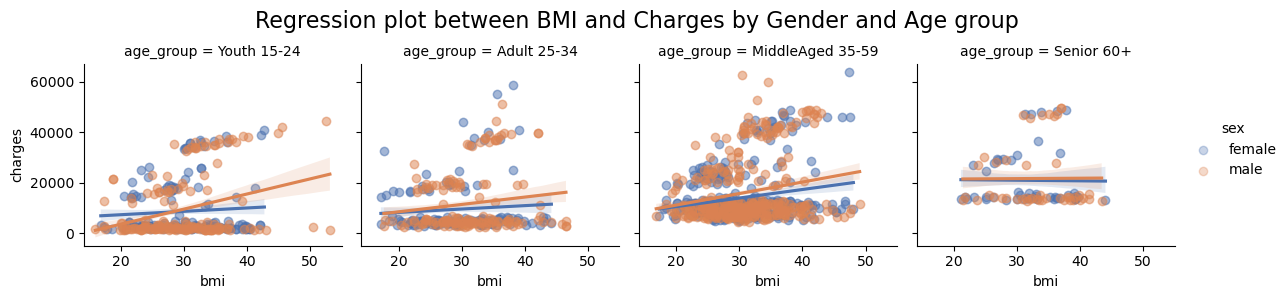

In [34]:
g = sns.FacetGrid(data, col= "age_group", hue= "sex", palette="deep")
g.map_dataframe(sns.regplot, x= "bmi", y= "charges", scatter_kws={'alpha':0.3})
g.add_legend()
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("Regression plot between BMI and Charges by Gender and Age group", fontsize=16);

## 5) Number of children:

### What's the average number of children? Do the observations have more children than no children?
There was an average of 1.10 children per observation. There're those who have no children and those with children from 1 up to 5. The majority of observations (1,186 / 43%) has no children. Those with children are commonly have 1 child (672 / 24%). 2-3 children are slightly lesser (496 / 18% and 324 / 12% respectively). Those with 4-5 children are only 4% of all observations.

#### Summary statistics of Number of children:

In [35]:
# explore children
data["children"].describe().apply("{0:.2f}".format)

count    2772.00
mean        1.10
std         1.21
min         0.00
25%         0.00
50%         1.00
75%         2.00
max         5.00
Name: children, dtype: object

#### Count of Number of children:

In [36]:
df = data.groupby("children", as_index= False).size()
df["%"] = df["size"] / sum(df["size"]) * 100
df.style.format('{0:,.0f}')

,children,size,%
0,0,"1,186",43
1,1,672,24
2,2,496,18
3,3,324,12
4,4,52,2
5,5,42,2


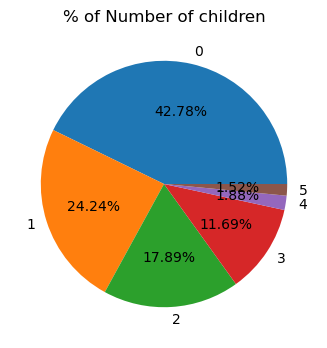

In [37]:
fig, axs = plt.subplots(figsize= (8, 4))
plt.pie(df["size"], labels= df["children"], autopct= '%.2f%%')
plt.title("% of Number of children");

### Do those with more children have higher medical costs than those with no children?
The percentage of total charges by number of children appears to have similar trend to the percentage of total number of observations where those with no children have the highest total charges (\\$14,609,054 / 40%) and the total charges are decreasing among those with more children. The charges of those with 5 children are the lowest (\\$365,653 / 1%). The average charges per person is higher for those with 2-3 children (\\$15,268 and \\$15,304 respectively) while those with 5 children have the lowest average charges per person of \\$8,706. Number of children factor overall shows very slightly impact and doesn't appear to be significant to influence the charges.

When adding age and gender into the number of children analysis, the results indicate number of children has more impact on the costs among Senior 60+ age group - the higher number of children appears to increase the medical cost in this group when it doesn't seem to have much impact at all on Adult and MiddleAged groups. Number of children doesn't make different impact on costs between male and female.

#### Summaries of Charges by Number of children:

In [38]:
pivot = data.pivot_table(index="children",
                         values="charges", 
                         aggfunc=["mean", "sum", "min", "max"],
                         margins= True).rename(columns= {'mean': 'avg', 'sum': 'total'})
pivot['%total charges'] = round((pivot['total'] / pivot['total'][:-1].sum()) * 100)
pivot.style.format('{0:,.1f}')

,avg,total,min,max,%total charges
,charges,charges,charges,charges,
children,,,,,
0,"12,317.9","14,609,054.2","1,121.9","63,770.4",40.0
1,"12,722.7","8,549,621.2","1,711.0","58,571.1",23.0
2,"15,268.2","7,573,018.6","2,304.0","49,577.7",21.0
3,"15,304.1","4,958,518.9","3,443.1","60,021.4",13.0
4,"13,551.0","704,651.2","4,504.7","40,182.2",2.0
5,"8,706.0","365,653.5","4,687.8","19,023.3",1.0
All,"13,261.4","36,760,517.5","1,121.9","63,770.4",100.0


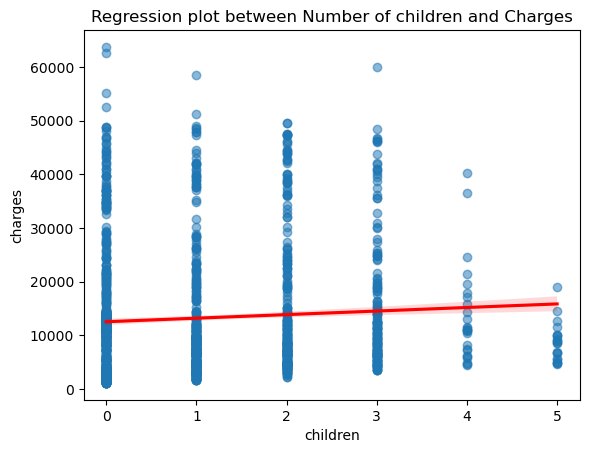

In [39]:
sns.regplot(data, x= "children", y= "charges", line_kws=dict(color="r"), scatter_kws={'alpha':0.3}).set_title("Regression plot between Number of children and Charges");

#### Summaries of Charges by Number of children and Gender:

In [40]:
data.pivot_table(index="children", columns="sex",
                 values="charges",
                 aggfunc=["mean"],
                 margins= True).rename(columns= {'mean': 'avg charges'}).style.format('{0:,.2f}')

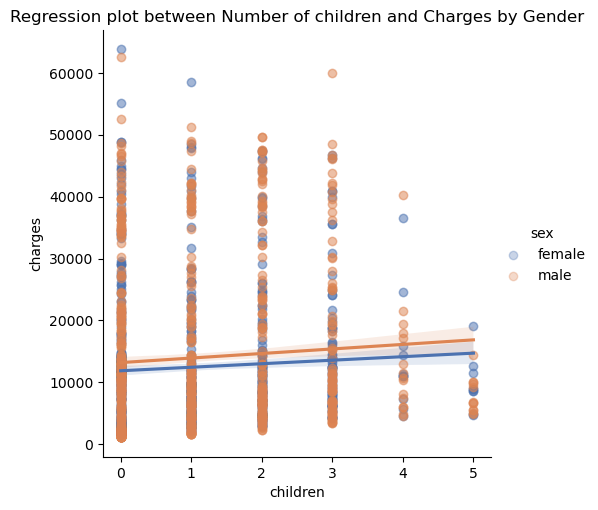

In [41]:
sns.lmplot(data, x= "children", y= "charges", hue= "sex", scatter_kws={'alpha':0.3}, palette="deep")
ax = plt.gca()
ax.set_title("Regression plot between Number of children and Charges by Gender");

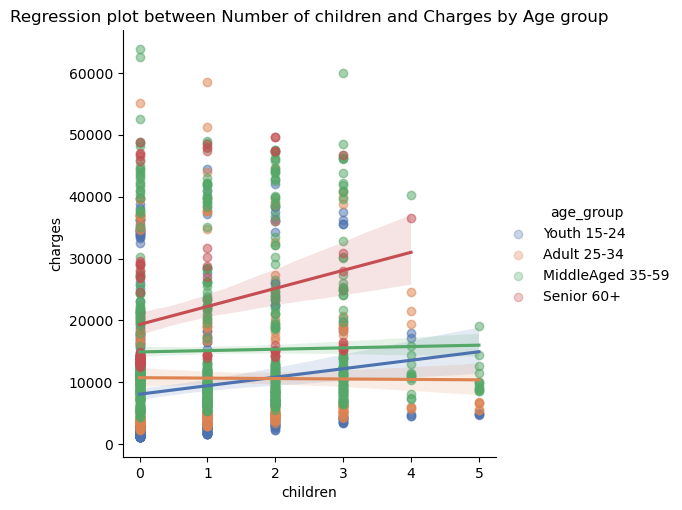

In [42]:
sns.lmplot(data, x= "children", y= "charges", hue= "age_group", scatter_kws={'alpha':0.3}, palette="deep")
ax = plt.gca()
ax.set_title("Regression plot between Number of children and Charges by Age group");

## 6) Smoker:
### How smoking affects medical costs?
20% (564) of all observations are smokers. While the number of smokers is 4 times less than the non-smokers, the total medical costs of the smokers (\\$18,173,851) are as high as the non-smokers (\\$18,586,667). Expectedly, the average costs per person (\\$32,223) is also 4 times higher than the non-smokers (\\$8,418). Maximum costs of smokers (\\$63,770) are doubled the maximum cost of non-smokers (\\$36,911) and minimum costs are 12 times higher (\\$12,829 vs. \\$1,122)! MiddleAged 35-59 is the largest age group among the smokers (266 / 47%) and they also have the highest total charges. Senior 60+ is the smallest group (46 / 8%) of the smokers but have the highest average charges per person. The results indicate that smoking significantly increases medical cost. 

#### Count of Smoker:

In [43]:
# explore smoker
df = data.groupby("smoker", as_index= False).size()
df["%"] = df["size"] / sum(df["size"]) * 100
df

,smoker,size,%
0,no,2208,79.65368
1,yes,564,20.34632


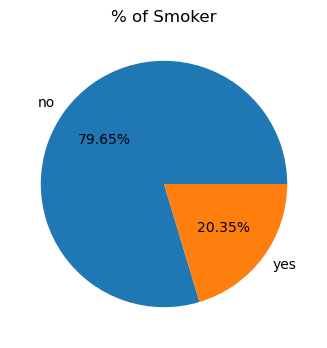

In [44]:
fig, axs = plt.subplots(figsize= (8, 4))
plt.pie(df["size"], labels= df["smoker"], autopct= '%.2f%%')
plt.title("% of Smoker");

#### Summaries of Charges by Smoker:

In [45]:
data.pivot_table(index="smoker",
                values="charges", 
                 aggfunc=["mean", "sum", "min", "max"],
                 margins= True).rename(columns= {'mean': 'avg', 'sum': 'total'}).style.format('{0:,.0f}')

,avg,total,min,max
,charges,charges,charges,charges
smoker,,,,
no,"8,418","18,586,667","1,122","36,911"
yes,"32,223","18,173,851","12,829","63,770"
All,"13,261","36,760,518","1,122","63,770"


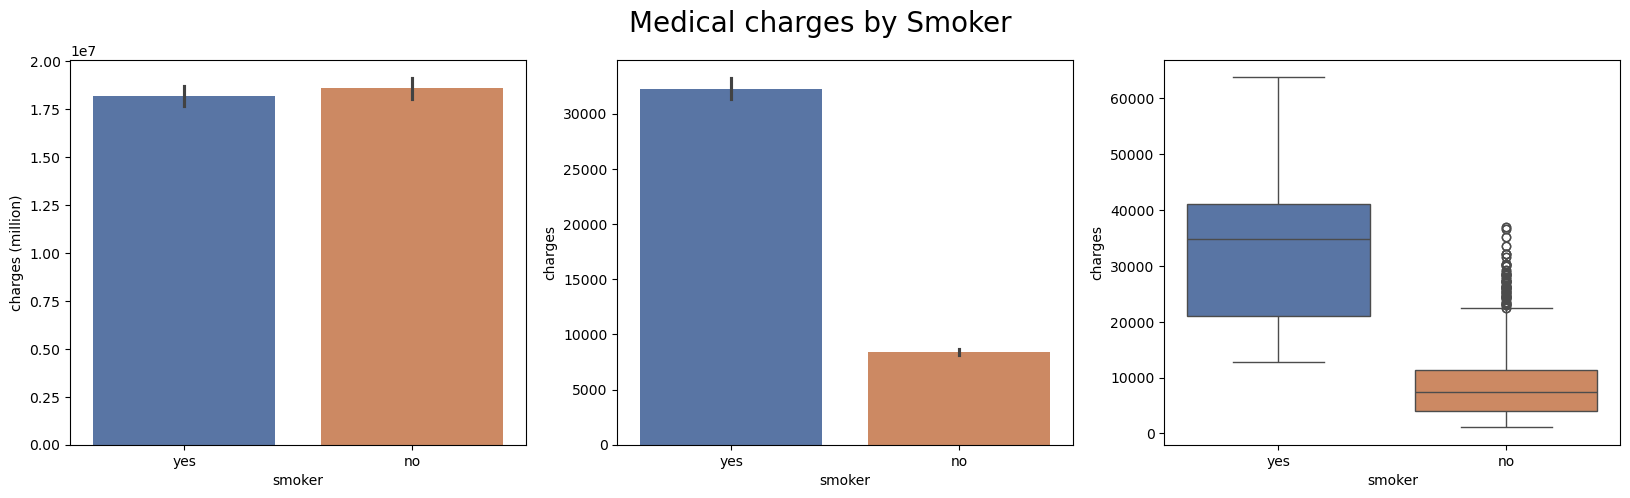

In [46]:
# smoker vs charges
fig, axs = plt.subplots(ncols= 3, figsize= (20, 5))
sns.barplot(data, x= "smoker", y= "charges", estimator= "sum", ax= axs[0], palette="deep").set(ylabel= "charges (million)")
sns.barplot(data, x= "smoker", y= "charges", ax= axs[1], palette="deep")
sns.boxplot(data, x= "smoker", y= "charges", ax= axs[2], palette="deep")

fig.suptitle("Medical charges by Smoker", fontsize= 20);

#### Count of Smoker (Yes only) by Age group:

In [47]:
# smoker only data
df_smoke = data[data["smoker"] == "yes"]
df = pd.crosstab(df_smoke["smoker"], df_smoke["age_group"], margins= False)
df

df = df_smoke.groupby("age_group", as_index= False).size()
df["%"] = df["size"] / sum(df["size"]) * 100
df

,age_group,size,%
0,Youth 15-24,134,23.758865
1,Adult 25-34,118,20.921986
2,MiddleAged 35-59,266,47.163121
3,Senior 60+,46,8.156028


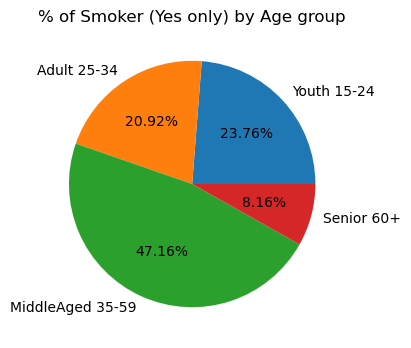

In [48]:
fig, axs = plt.subplots(figsize= (8, 4))
plt.pie(df["size"], labels= df["age_group"], autopct= '%.2f%%')
plt.title("% of Smoker (Yes only) by Age group");

#### Summaries of Charges by Smoker (Yes only) and Age group:

In [49]:
data.pivot_table(index="smoker", columns="age_group",
                 values="charges",
                 aggfunc=["mean", "sum"],
                 margins= True).rename(columns= {'mean': 'avg charges', 'sum': 'total charges'}).style.format('{0:,.0f}')

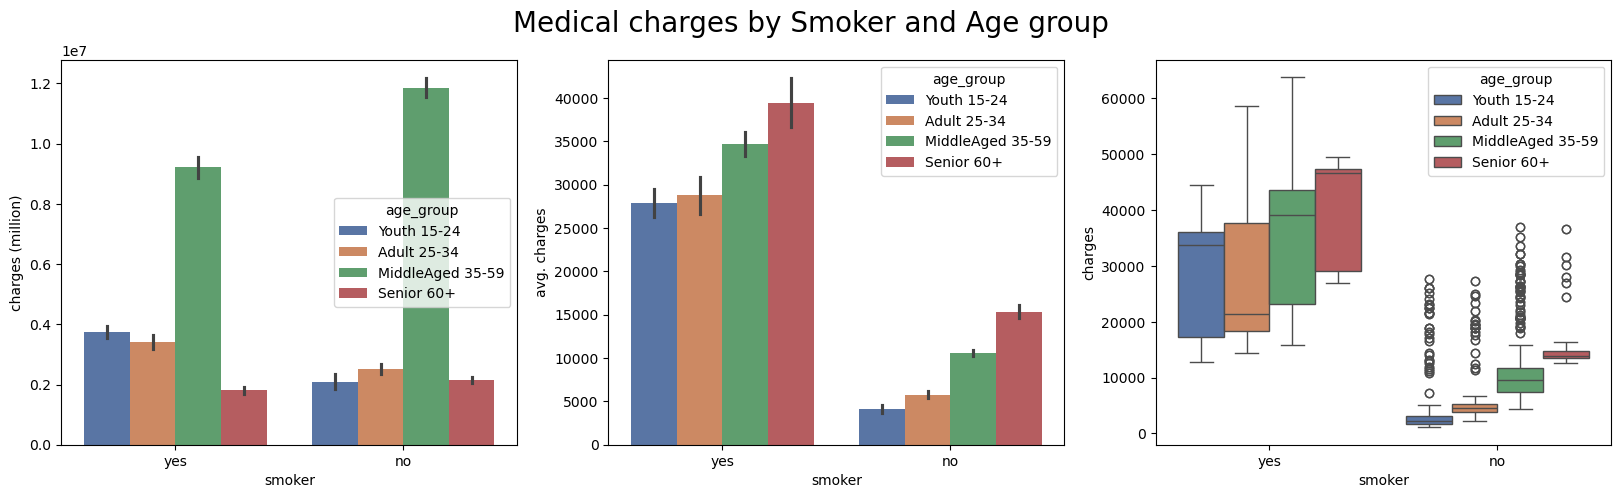

In [50]:
fig, axs = plt.subplots(ncols= 3, figsize= (20, 5))
sns.barplot(data, x= "smoker", y= "charges", hue="age_group", estimator= "sum", ax= axs[0], palette="deep").set(ylabel= "charges (million)")
sns.barplot(data, x= "smoker", y= "charges", hue="age_group", ax= axs[1], palette="deep").set(ylabel= "avg. charges")
sns.boxplot(data, x= "smoker", y= "charges", hue="age_group", ax= axs[2], palette="deep")

fig.suptitle("Medical charges by Smoker and Age group", fontsize= 20);

## 7) Region:

There isn't much significantly different in the total number of observations between the four regions. Southeast (766 / 28%) appears to be slightly higher than others (24%-25%) in size; the region also has the highest number of smokers (192 / 34%), highest average BMI per person (33.48), and distinctly high in number of Extremely Obese group (320 / 48%). Northeast region is highest in number (150 / 32%) of Healthy BMI group. Correlating with its higher number of observations, Southeast region has highest total charges (\\$11,297,563 / 31%) and average charges per person (\\$14,748) than other regions. The overall average charge by region is \\$13,261. Region factor appears to have very slightly impact on medical cost.

#### Count of Region:

In [51]:
# explore region
df = data.groupby("region", as_index= False).size()
df["%"] = df["size"] / sum(df["size"]) * 100
df

,region,size,%
0,northeast,658,23.737374
1,northwest,664,23.953824
2,southeast,766,27.633478
3,southwest,684,24.675325


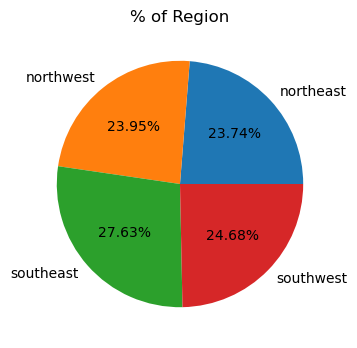

In [52]:
fig, axs = plt.subplots(figsize= (8, 4))
plt.pie(df["size"], labels= df["region"], autopct= '%.2f%%')
plt.title("% of Region");

#### Count of Region by Age group:

In [53]:
# add percent of column
df = pd.crosstab(data["region"], data["age_group"], margins= True)
df['%Youth 15-24'] = round((df['Youth 15-24'] / df['Youth 15-24'][:-1].sum()) * 100)
df['%Adult 25-34'] = round((df['Adult 25-34'] / df['Adult 25-34'][:-1].sum()) * 100)
df['%MiddleAged 35-59'] = round((df['MiddleAged 35-59'] / df['MiddleAged 35-59'][:-1].sum()) * 100)
df['%Senior 60+'] = round((df['Senior 60+'] / df['Senior 60+'][:-1].sum()) * 100)
# df['%All'] = round((df['All'] / df['All'][:-1].sum()) * 100)
df

age_group,Youth 15-24,Adult 25-34,MiddleAged 35-59,Senior 60+,All,%Youth 15-24,%Adult 25-34,%MiddleAged 35-59,%Senior 60+
region,,,,,,,,,
northeast,148,130,338,42,658,23.0,23.0,24.0,23.0
northwest,160,128,330,46,664,25.0,23.0,24.0,25.0
southeast,182,156,374,54,766,28.0,28.0,27.0,29.0
southwest,154,140,346,44,684,24.0,25.0,25.0,24.0
All,644,554,1388,186,2772,100.0,100.0,100.0,100.0


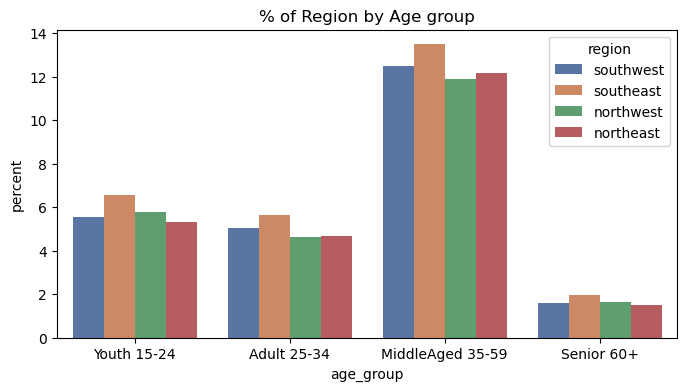

In [54]:
fig, axs = plt.subplots(figsize= (8, 4))
ax = sns.countplot(data, x= "age_group", hue= "region", stat= "percent", palette="deep")
ax.set_title("% of Region by Age group");

#### Count of Region by Smoker:

In [55]:
# add percent of column
df = pd.crosstab(data["region"], data["smoker"], margins= True)
df['%no'] = round((df['no'] / df['no'][:-1].sum()) * 100)
df['%yes'] = round((df['yes'] / df['yes'][:-1].sum()) * 100)
# df['%All'] = round((df['All'] / df['All'][:-1].sum()) * 100)
df

smoker,no,yes,All,%no,%yes
region,,,,,
northeast,522,136,658,24.0,24.0
northwest,546,118,664,25.0,21.0
southeast,574,192,766,26.0,34.0
southwest,566,118,684,26.0,21.0
All,2208,564,2772,100.0,100.0


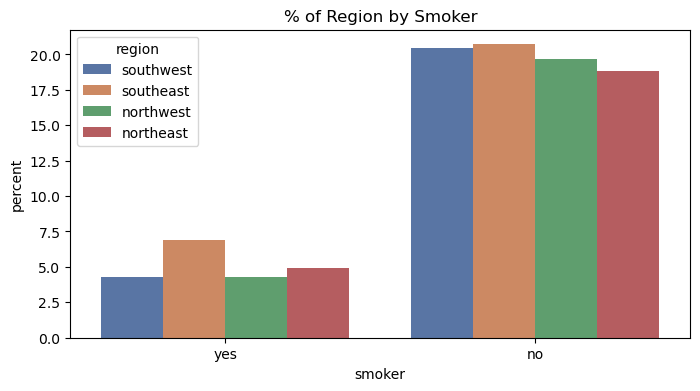

In [56]:
fig, axs = plt.subplots(figsize= (8, 4))
ax = sns.countplot(data, x= "smoker", hue= "region", stat= "percent", palette="deep")
ax.set_title("% of Region by Smoker");

#### Summaries of BMI by Region:

In [57]:
data.pivot_table(index="region",
                 values="bmi",
                 aggfunc=["mean", "min", "max"],
                 margins= True).rename(columns= {'mean': 'avg'}).style.format('{0:,.2f}')

,avg,min,max
,bmi,bmi,bmi
region,,,
northeast,29.16,15.96,48.07
northwest,29.15,17.39,42.94
southeast,33.48,19.80,53.13
southwest,30.58,17.40,47.60
All,30.70,15.96,53.13


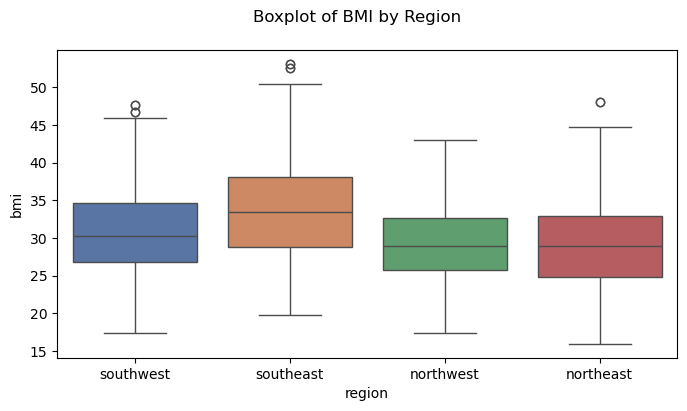

In [58]:
fig, axs = plt.subplots(figsize= (8, 4))
sns.boxplot(data, x= "region", y= "bmi", palette="deep")
fig.suptitle("Boxplot of BMI by Region");

#### Count of Region by BMI group:

In [59]:
# add percent of column
df = pd.crosstab(data["region"], data["bmi_group"], margins= True)
df['%Underweight <18.5'] = round((df['Underweight <18.5'] / df['Underweight <18.5'][:-1].sum()) * 100)
df['%Healthy 18.5-24.9'] = round((df['Healthy 18.5-24.9'] / df['Healthy 18.5-24.9'][:-1].sum()) * 100)
df['%Overweight 25-29.9'] = round((df['Overweight 25-29.9'] / df['Overweight 25-29.9'][:-1].sum()) * 100)
df['%Obese 30-34.9'] = round((df['Obese 30-34.9'] / df['Obese 30-34.9'][:-1].sum()) * 100)
df['%Extremely Obese >35'] = round((df['Extremely Obese >35'] / df['Extremely Obese >35'][:-1].sum()) * 100)
# df['%All'] = round((df['All'] / df['All'][:-1].sum()) * 100)
df

bmi_group,Underweight <18.5,Healthy 18.5-24.9,Overweight 25-29.9,Obese 30-34.9,Extremely Obese >35,All,%Underweight <18.5,%Healthy 18.5-24.9,%Overweight 25-29.9,%Obese 30-34.9,%Extremely Obese >35
region,,,,,,,,,,,
northeast,20,150,198,184,106,658,48.0,32.0,25.0,23.0,16.0
northwest,14,132,218,212,88,664,33.0,28.0,28.0,26.0,13.0
southeast,0,86,164,196,320,766,0.0,18.0,21.0,24.0,48.0
southwest,8,106,210,210,150,684,19.0,22.0,27.0,26.0,23.0
All,42,474,790,802,664,2772,100.0,100.0,100.0,100.0,100.0


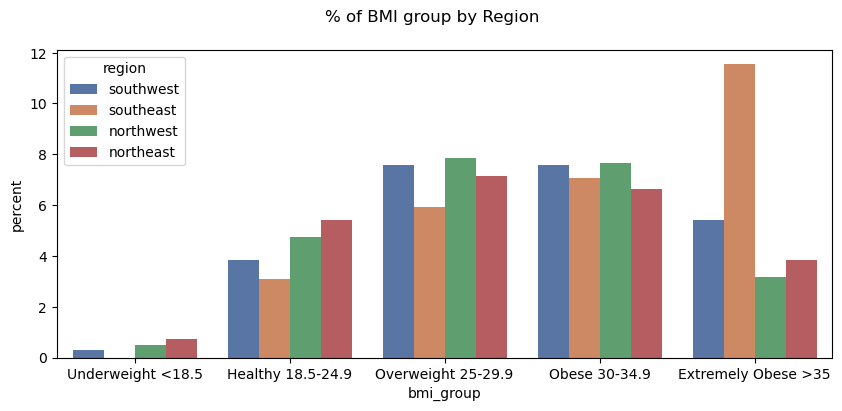

In [60]:
fig, axs = plt.subplots(figsize= (10, 4))
sns.countplot(data, x= "bmi_group", hue= "region", stat= "percent", palette="deep")
fig.suptitle("% of BMI group by Region");

#### Summaries of Charges by Region:

In [61]:
pivot = data.pivot_table(index="region",
                values="charges", 
                 aggfunc=["mean", "sum", "min", "max"],
                 margins= True).rename(columns= {'mean': 'avg', 'sum': 'total'})
pivot['%total charges'] = round((pivot['total'] / pivot['total'][:-1].sum()) * 100)
pivot.style.format('{0:,.1f}')

,avg,total,min,max,%total charges
,charges,charges,charges,charges,
region,,,,,
northeast,"13,475.9","8,867,125.6","1,694.8","58,571.1",24.0
northwest,"12,463.1","8,275,517.9","1,621.3","60,021.4",23.0
southeast,"14,748.8","11,297,563.7","1,121.9","63,770.4",31.0
southwest,"12,164.2","8,320,310.4","1,241.6","52,590.8",23.0
All,"13,261.4","36,760,517.5","1,121.9","63,770.4",100.0


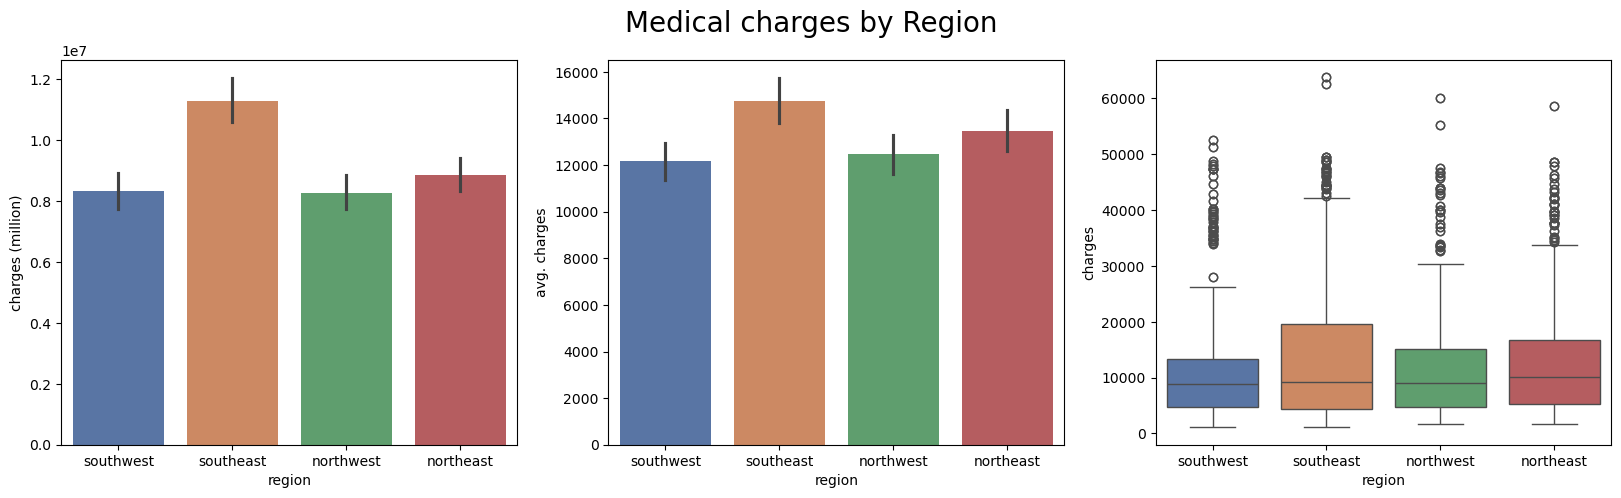

In [62]:
fig, axs = plt.subplots(ncols= 3, figsize= (20, 5))
sns.barplot(data, x= "region", y= "charges", estimator= "sum", ax= axs[0], palette="deep").set(ylabel= "charges (million)")
sns.barplot(data, x= "region", y= "charges", ax= axs[1], palette="deep").set(ylabel= "avg. charges")
sns.boxplot(data, x= "region", y= "charges", ax= axs[2], palette="deep")

fig.suptitle("Medical charges by Region", fontsize= 20);

## Correlation Matrix
The matrix is used to explore more on the correlation coefficients between variables to see how they correlate with each other more specifically to the medical charges and to check if the measures are consistent with the results discovered so far. The non-numeric variables (sex, smoker, and region) got coded to numeric values. The observable pattern shows these three variables highly correlate with medical charges 1. smoker (r= 0.79) 2. age (r= 0.3) and 3. bmi (r= 0.2). Other variables (sex, children, and region) appear to have lower correlation to charges and the values are insignificant.

In [63]:
# replace Sex, Smoker, and Region as numerical
data_corr = data.copy()
data_corr = data_corr.drop(columns= "age_group")
data_corr = data_corr.drop(columns= "bmi_group")
data_corr.replace({"sex": {"male": 0, "female": 1}}, inplace= True)
data_corr.replace({"smoker": {"no": 0, "yes": 1}}, inplace= True)
data_corr.replace({"region": {"southwest": 0, "southeast": 1, "northwest": 2, "northeast": 3}}, inplace= True)
data_corr.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


#### Matrix plot of all variables:

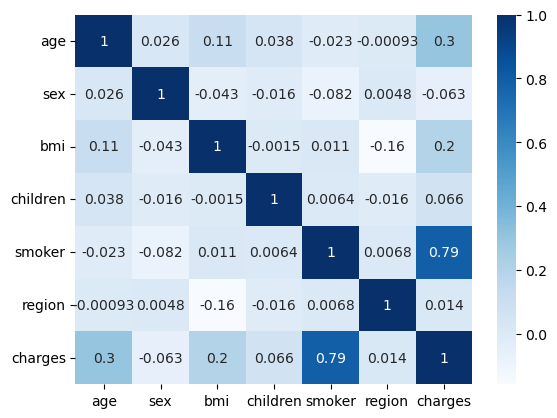

In [64]:
df_corr = data_corr.corr()
plt.figure()
sns.heatmap(df_corr, cmap= "Blues", annot= True);

# Conclusion
Throughout this project exploratory data analysis was performed by creating summary statistics and plots incorporating with correlation matrix to study the data. The results are discovered as follows:

- The **medical insurance cost data set** contains 2,772 observations and 7 variables including Age, Sex, BMI (body mass index), Children, Smoker, Region, and Charges.

- **Charges:** the total charges of all observations are \\$36,760,517. The average charges per person is \\$13,261. The lowest charges are \\$1,121 and the maximum charges are \\$63,770.

- **Age:** the average age of observations is 39, the youngest is 18, and 64 is the oldest. MiddleAged 35-59 age group has the highest number of observations (1,388 / 50%) and the highest total charges (\\$21,081,091 / 57%). Senior 60+ age group is the smallest group (186 / 7%) and has the lowest total charges ($3,959,593 / 11%) but they have the highest average charges per person (\\$21,288). There’s a strong indication that the medical costs increase corresponding to the increase of age.

- **Gender:** there're slightly more male (51%) than female (49%). Male group also has slightly higher total charges (\\$19,703,505 / 54%) and average charges per person (14,013) than female (total: \\$17,057,012 / avg: \\$12,486). Gender appears to have very slightly impact on medical charges and doesn’t appear to be significant.

- **BMI:** the observations’ average BMI is 30.7, the lowest BMI is 15.96, and 53.13 is the highest. Only 17% is considered to have healthy BMI and 2% as underweight. The rest fall into overweight (28%), obese (29%), and Extremely Obese groups (24%). Obese and extremely Obese groups have the highest total charges (\\$11,515,170 / 31% and \\$11,315,529 / 31% respectively). Extremely Obese group has the highest average cost per person (\\$17,041). There’s significant indication that the medical costs increase corresponding to the increase of BMI. BMI factor appears in have more impact on medical costs of those Youth 15-24 to MiddleAged 35-59 and male than female. 

- **Children:** the majority of observations (43%) has no children. The average number of children is 1.10 per observation. The highest total cost is among those with no kids (\\$14,609,054 / 40%). Those with 2-3 children are highest in average cost per person (\\$15,268 and \\$15,304 respectively). There’s an indication that number of children alone doesn’t have significant impact on the medical costs. However, when considering children by age groups the results indicate that those Senior 60+ age group with more children are likely to have higher medical charges.

- **Smoker:** 20% (564) of all observations are smokers. However, the total charges of smokers are as equally as high as the non-smokers (\\$18,173,851 and \\$18,586,667 respectively). The average costs per person of the smokers is 4 times higher than non-smokers (\\$32,223 and \\$8,418 respectively). There’s strong indication that smoking increases the medical charges.

- **Region:** Southeast (28%) has slightly higher number of observations than northeast (24%), Northwest (24%), and Southwest (25%). Southeast region also has the highest number of smokers (34%) and highest average BMI (33.48). The region has the highest number of extremely obese group. Region appears to have low impact on medical charges.

The top three factors that show strong influence on medical costs are **1. smoker (r= 0.79) 2.age (r= 0.3) and 3.bmi (r= 0.2)**. Although other variables (sex, children, and region) show some level of correlation, they appear to have minimal impact on the costs. While these variables are insignificant, the results show that when adding these variables as a third factor to the analysis they can create different impact to the result like what was discovered that the costs are likely to be higher in the Senior 60+ age group with more children than other age groups. This is something that can be explored further.